##### Dataset

In [210]:
# Social_Network_Ads.csv
# Location: https://mitu.co.in/dataset

##### Import the libraries

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Read the data

In [212]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


##### Separate the input and output variables

In [213]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [214]:
x.shape

(400, 2)

In [215]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [216]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [217]:
set(y)

{0, 1}

In [218]:
np.unique(y)

array([0, 1])

/tmp/ipykernel_304222/215970029.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='tab10');


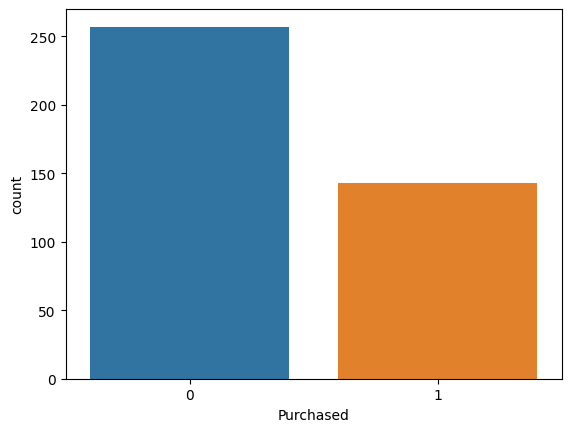

In [219]:
sns.countplot(x=y, palette='tab10');

In [220]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

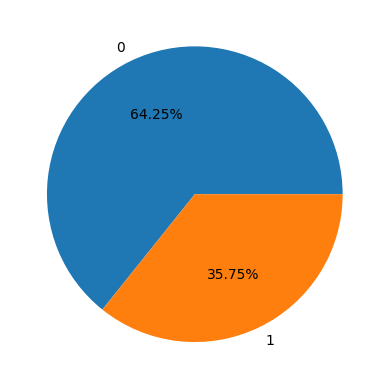

In [221]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

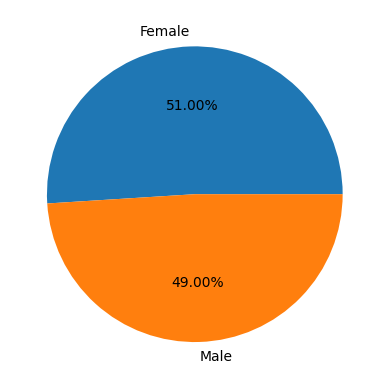

In [222]:
plt.pie(df['Gender'].value_counts(), 
        labels=df['Gender'].value_counts().index, 
        autopct='%2.2f%%');

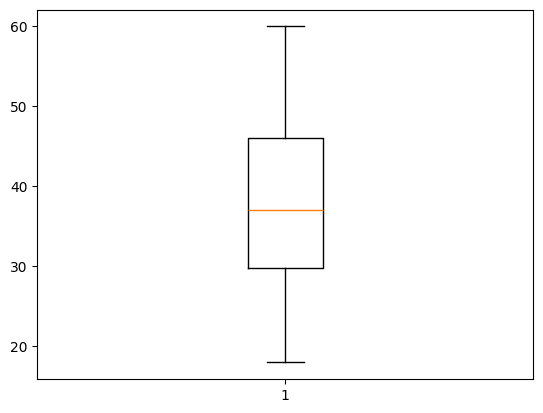

In [223]:
plt.boxplot(df['Age']);

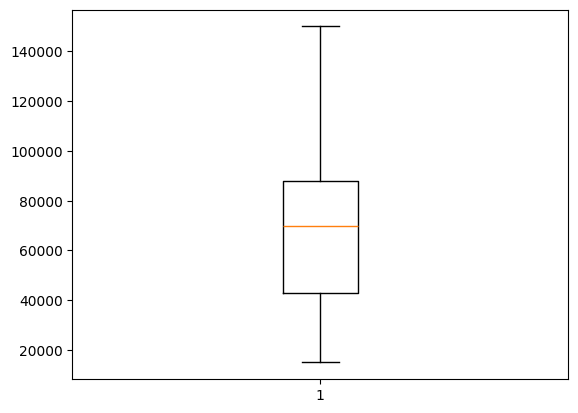

In [224]:
plt.boxplot(df['EstimatedSalary']);

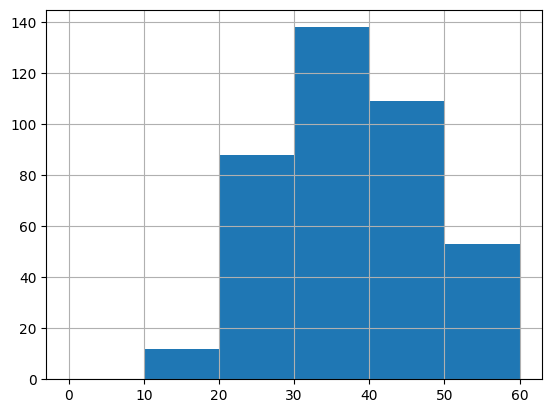

In [225]:
plt.xticks(range(0,61,10))
plt.grid()
plt.hist(df['Age'], range(0,61,10));

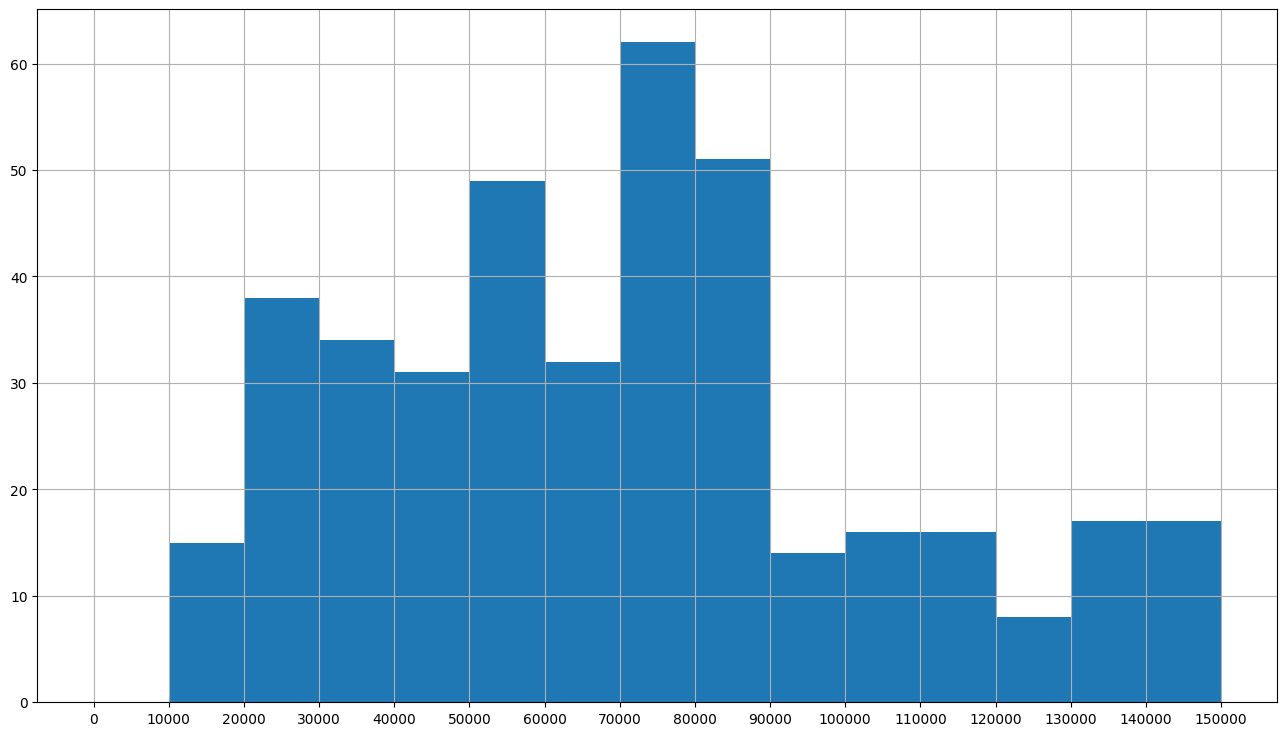

In [226]:
plt.figure(figsize=(16,9))
plt.xticks(range(0,150001,10000))
plt.grid()
plt.hist(df['EstimatedSalary'], range(0,150001,10000));

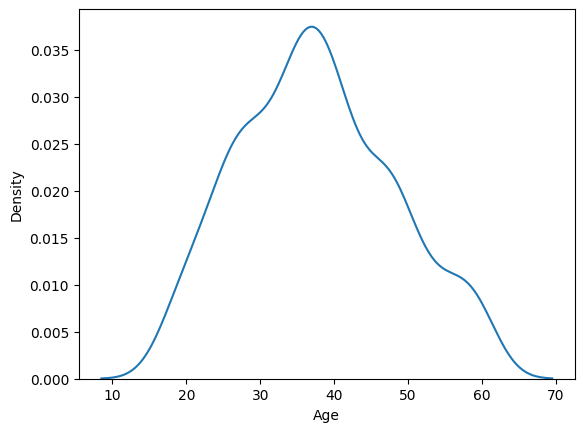

In [227]:
sns.kdeplot(df['Age']);

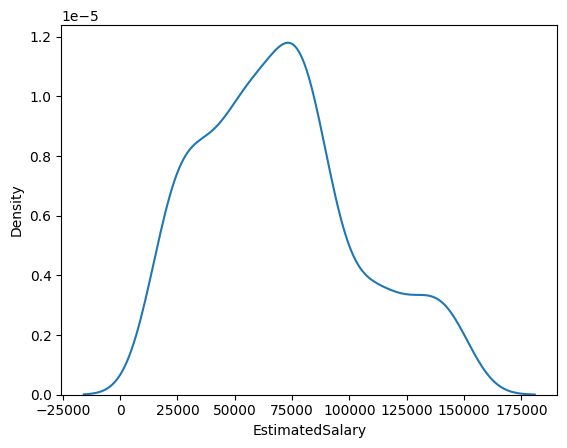

In [228]:
sns.kdeplot(df['EstimatedSalary']);

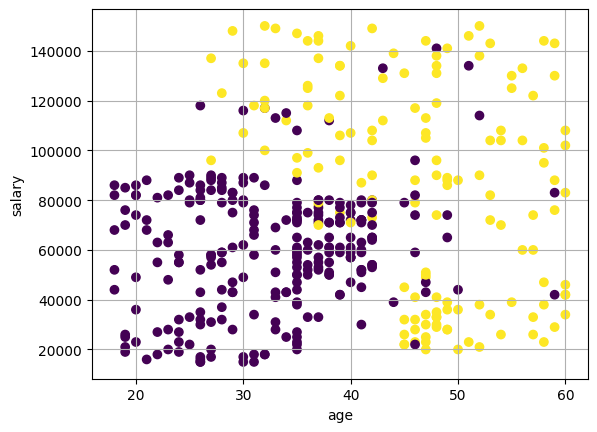

In [229]:
plt.xlabel('age')
plt.ylabel('salary')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'], c=y)

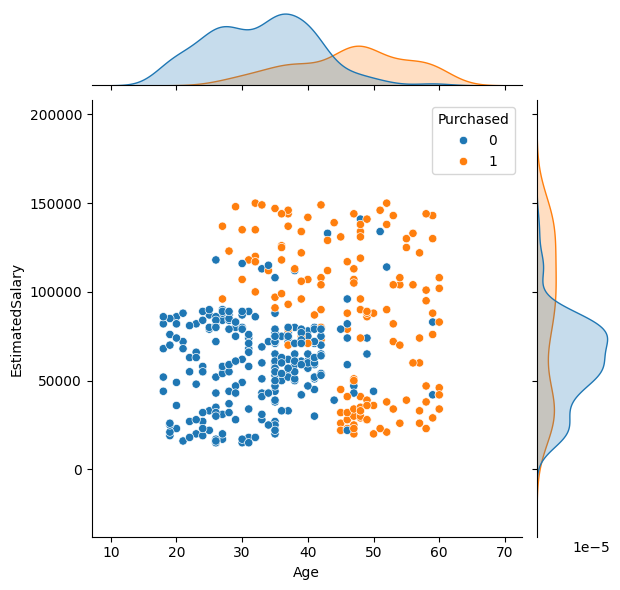

In [230]:
sns.jointplot(x='Age', y='EstimatedSalary', data=df, hue='Purchased')

##### Feature Scaling

In [231]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [232]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


##### Cross Validation

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, random_state=0)

In [235]:
x_train.shape

(300, 2)

In [236]:
x_test.shape

(100, 2)

##### Build the model

In [237]:
from sklearn.linear_model import LogisticRegression

In [238]:
classifier = LogisticRegression()

In [239]:
# train the algorithm
classifier.fit(x_train, y_train)

LogisticRegression()

##### Predict on the unseen data

In [240]:
y_pred = classifier.predict(x_test)

In [241]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [242]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [243]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

##### Performance Evaluation

In [244]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [245]:
print(confusion_matrix(y_test, y_pred))

[[67  1]
 [10 22]]


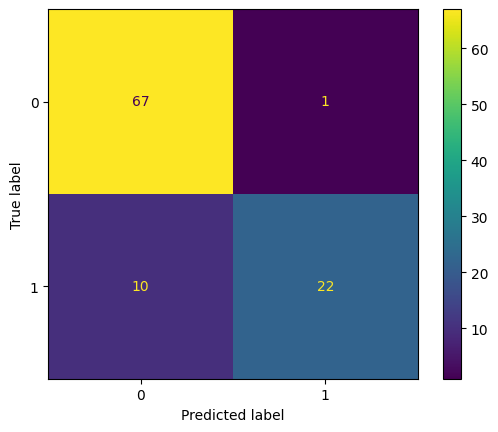

In [246]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [247]:
accuracy_score(y_test, y_pred)

0.89

In [248]:
cm = confusion_matrix(y_test, y_pred)

In [249]:
cm.diagonal().sum() / cm.sum()

0.89

In [250]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [251]:
# recall-0 / accuracy of class 0 / sensitivity of algorithm
r0 = 67/68
r0

0.9852941176470589

In [252]:
# recall-1 / accuracy of class 1 / specificity of algorithm
r1 = 22/32
r1

0.6875

In [253]:
# precision-0 / Positive Predictive Value
p0 = 67/77
p0

0.8701298701298701

In [254]:
# precision-1 / Negative Predictive Value
p1 = 22/23
p1

0.9565217391304348

In [255]:
# f1-score - 0
2 * p0 * r0 / (p0 + r0)

0.9241379310344828

In [256]:
# f1-score - 1
2 * p1 * r1 / (p1 + r1)

0.8

In [257]:
classifier.predict_proba(x_test)

array([[0.79225834, 0.20774166],
       [0.75067874, 0.24932126],
       [0.72745429, 0.27254571],
       [0.8159242 , 0.1840758 ],
       [0.81025799, 0.18974201],
       [0.95014473, 0.04985527],
       [0.92927087, 0.07072913],
       [0.39370124, 0.60629876],
       [0.95662616, 0.04337384],
       [0.54623349, 0.45376651],
       [0.88624081, 0.11375919],
       [0.89780651, 0.10219349],
       [0.7548652 , 0.2451348 ],
       [0.61732595, 0.38267405],
       [0.92568557, 0.07431443],
       [0.63220622, 0.36779378],
       [0.67066218, 0.32933782],
       [0.93447243, 0.06552757],
       [0.08457049, 0.91542951],
       [0.87847026, 0.12152974],
       [0.81877656, 0.18122344],
       [0.15276153, 0.84723847],
       [0.67567934, 0.32432066],
       [0.27289303, 0.72710697],
       [0.96313902, 0.03686098],
       [0.13128108, 0.86871892],
       [0.82800591, 0.17199409],
       [0.83014568, 0.16985432],
       [0.72970907, 0.27029093],
       [0.75480803, 0.24519197],
       [0.

##### Prediction on unseen data

In [258]:
new = np.array([[23,45000],[54,148000],[37,63000]])

In [259]:
new

array([[    23,  45000],
       [    54, 148000],
       [    37,  63000]])

In [260]:
new_scaled = scaler.transform(new)
new_scaled

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.11904762, 0.22222222],
       [0.85714286, 0.98518519],
       [0.45238095, 0.35555556]])

In [261]:
classifier.predict(new_scaled)

array([0, 1, 0])

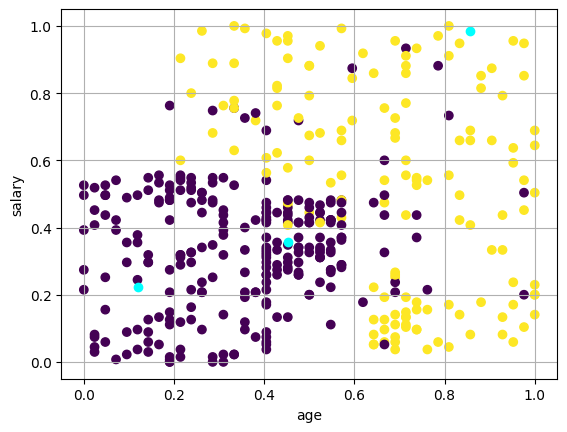

In [262]:
plt.xlabel('age')
plt.ylabel('salary')
plt.grid()
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=y)
plt.scatter(new_scaled[:,0], new_scaled[:,1], color='cyan')

In [263]:
classifier.predict_proba(new_scaled)

array([[0.94995459, 0.05004541],
       [0.06890179, 0.93109821],
       [0.72598556, 0.27401444]])

In [264]:
from sklearn.metrics import roc_curve, roc_auc_score

In [206]:
# Predict probabilities
y_prob = classifier.predict_proba(x_test)[:, 1]

In [207]:
# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

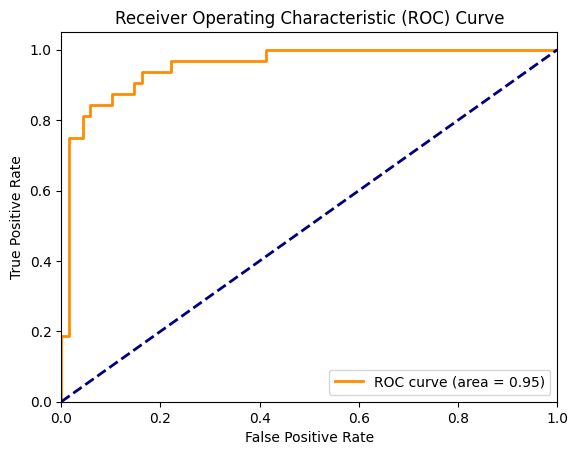

In [266]:
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')